In [1]:
# Import all Necessary Packages 
import itertools
from itertools import product 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso

%matplotlib inline

In [2]:

def load_data():
    data = pd.read_csv('data.csv')
    data.sort_values('radius_mean', inplace=True, ascending=False)
    data.reset_index(inplace=True, drop=True)

    #Random shuffle
    data = data.sample(frac=1, random_state=1).reset_index(drop=True)

    #Split into training and test datasets
    Train_int = int(len(data) - np.floor(0.8 * len(data)))
    data_train = data.iloc[Train_int:]
    data_test = data.iloc[:Train_int]

    #replace the strings corresponding to M and B with boolean outputs 
    data_train['diagnosis'] = data_train['diagnosis'].replace('B',0);
    data_train['diagnosis'] = data_train['diagnosis'].replace('M',1);
    
    data_test['diagnosis'] = data_test['diagnosis'].replace('B',0);
    data_test['diagnosis'] = data_test['diagnosis'].replace('M',1);
 
    return data_train, data_test




In [3]:

def prepare_data_for_linear_regression(data_train, data_test, column):
    # Preprocess training and test data
    train_x = data_train[column].values
    test_x = data_test[column].values
    train_y = data_train['diagnosis'].values
    test_y = data_test['diagnosis'].values

    train_x = np.reshape(train_x,(len(train_x),1))
    train_X_mat=np.hstack((np.ones((len(train_x),1)), train_x))
    test_x = np.reshape(test_x,(len(test_x),1))
    test_X_mat=np.hstack((np.ones((len(test_x),1)), test_x))
    return train_X_mat, train_y, test_X_mat, test_y

def solve_linear_regression_sklearn(train_X_mat, train_y):
    model = LinearRegression().fit(train_X_mat,train_y)
    #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
    return model

def calculate_mse(predicted, true):
    MSE = np.square(np.subtract(true,predicted)).mean() 
    return MSE



In [4]:
#load train and test dataset 
data_train, data_test = load_data()

<ipython-input-2-6b41e3c2d6b6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['diagnosis'] = data_train['diagnosis'].replace('B',0);
<ipython-input-2-6b41e3c2d6b6>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['diagnosis'] = data_train['diagnosis'].replace('M',1);
<ipython-input-2-6b41e3c2d6b6>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

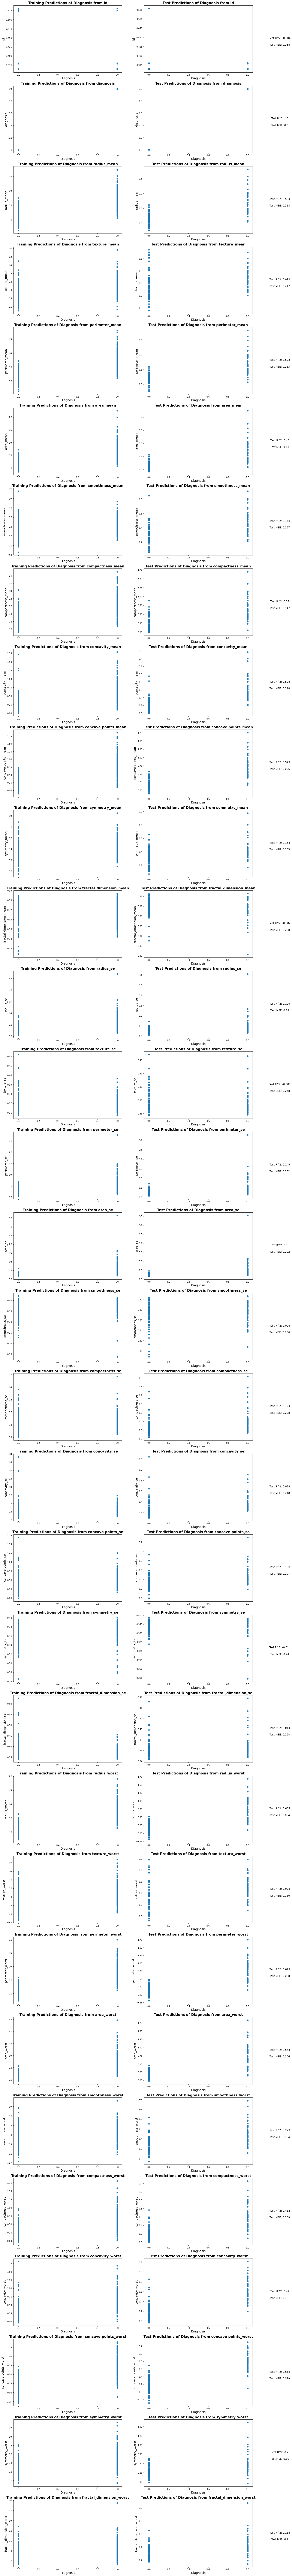

In [34]:
train_mse = []
train_r = []
test_mse = []
test_r = []
fig, axes = plt.subplots(figsize = [20,220], nrows=(len(data_train.T)-1), ncols=2)

for k in range((len(data_train.T)-1)):
    column = data_train.columns[k]
    column = str(column)
    
    train_X_mat, train_y, test_X_mat, test_y = prepare_data_for_linear_regression(data_train, data_test, column)

    model = solve_linear_regression_sklearn(train_X_mat, train_y)

    train_pred = model.predict(train_X_mat)
    test_pred = model.predict(test_X_mat)
    
    axes[k,0].scatter(train_y, train_pred)
    axes[k,0].set_xlabel('Diagnosis', fontsize = 14)
    axes[k,0].set_ylabel(column, fontsize = 14)
    axes[k,0].set_title("Training Predictions of Diagnosis from " +str(column), fontweight = 'bold', fontsize = 16)
    
    axes[k,1].scatter(test_y, test_pred)
    axes[k,1].set_xlabel('Diagnosis', fontsize = 14)
    axes[k,1].set_ylabel(column, fontsize = 14)
    axes[k,1].set_title("Test Predictions of Diagnosis from " +str(column), fontweight = 'bold', fontsize = 16)
    axes[k,1].text(1.25, 0.5, 'Test R^2: '+ str(round(model.score(test_X_mat,  test_y),3)), horizontalalignment='center', fontsize = 'large',transform= axes[k,1].transAxes)
    axes[k,1].text(1.25, 0.4, 'Test MSE: '+ str(round(calculate_mse(test_pred, test_y),3)), horizontalalignment='center', fontsize = 'large',transform= axes[k,1].transAxes)
    #stats for overall graphs 
    train_mse.append(calculate_mse(train_pred, train_y))
    train_r.append(model.score(train_X_mat,  train_y))
    test_mse.append(calculate_mse(test_pred,  test_y))
    test_r.append(model.score(test_X_mat, test_y ))
